<a href="https://colab.research.google.com/github/hzhang0110/hzhang_ML_Projects/blob/main/text_classification_XGBoost_spam_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import pandas as pd
import numpy as np
import string
import os

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import sklearn
import xgboost

In [124]:
nltk.download('stopwords')
nltk.download('punkt')
stopwords = set(stopwords.words('english'))
print(stopwords)

{'mightn', 's', 'most', 'y', 'is', 'do', 'am', 'been', "you'll", 'just', 'haven', 'very', 'again', 'my', "you'd", 'doesn', "wouldn't", 'his', 'or', 'itself', 'ma', 'any', 'in', 'there', 'has', 'below', 'doing', 'an', 'wouldn', "hadn't", 'than', 're', 'by', 'out', 'as', 'such', 'through', 'aren', 'will', 'myself', 'isn', 'so', 'who', 'when', 'm', 'while', 'hasn', 'only', 'we', 'hers', 'at', 'from', 'few', 'further', 'both', 'll', 'weren', 'that', "hasn't", "weren't", "wasn't", 'above', 'if', "that'll", 'once', 'hadn', 'whom', 'her', 'more', 'having', 'they', 'before', "isn't", 'wasn', "needn't", 'i', 'its', "couldn't", 'now', 'she', 'had', 'yours', "didn't", 'you', 'which', 'into', "won't", 'no', 'with', "aren't", 'did', 'needn', 'because', "it's", 'ours', 'herself', 'being', 'all', 'those', 'd', 'won', 'down', 'theirs', 'these', 'their', 't', "should've", 'too', 'himself', 'ain', 'have', 'couldn', 'other', 'can', 'shan', 'and', 'where', 'after', 'some', 'didn', 'until', 'your', 'same',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [125]:
data = pd.read_csv('/content/drive/MyDrive/machine_learning_files/spam_text_data/SPAM text message 20170820 - Data.csv')

data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [126]:
data.shape

(5572, 2)

In [127]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [128]:
data['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [129]:
#data preprocessing
def clean(x):
  x = x.lower()
  x = x.translate(str.maketrans('', '', string.punctuation))
  x = [word for word in word_tokenize(x) if word not in stopwords]
  x = " ".join(x)
  return x

In [130]:
data.dropna(inplace=True)

In [131]:
data['text_clean'] = data['Message'].apply(lambda x: clean(x))

In [132]:
data[['Message', 'text_clean']]

,Message,text_clean
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u £750 pound prize ...
5568,Will ü b going to esplanade fr home?,ü b going esplanade fr home
5569,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions
5570,The guy did some bitching but I acted like i'd...,guy bitching acted like id interested buying s...


In [133]:
data.isna().sum()

Category      0
Message       0
text_clean    0
dtype: int64

In [134]:
X = data['text_clean']
y = data['Category']

X.shape, y.shape

((5572,), (5572,))

In [135]:
from sklearn import model_selection, preprocessing, feature_extraction, naive_bayes, metrics, ensemble

encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [136]:
#convert X to vector using count vectorizer
vectorizer = feature_extraction.text.CountVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)


In [137]:
X.shape

(5572, 9426)

In [138]:
dic = vectorizer.vocabulary_
words = list(dic.keys())
word_id = list(range(0,len(words)-1))
feature_name = ["_".join(["feature", str(i)]) for i in word_id]
words[0:10]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'great',
 'world',
 'la',
 'buffet']

In [139]:
count_vect_df = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names_out())
count_vect_df

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
feature_names = vectorizer.get_feature_names_out()
feature_names[0:10]

array(['008704050406', '0089my', '0121', '01223585236', '01223585334',
       '0125698789', '02', '020603', '0207', '02070836089'], dtype=object)

In [144]:
#9426 unique words in this sample.
X.shape, count_vect_df.shape

((5572, 9426), (5572, 9426))

In [147]:
trainX, testX, trainY, testY = model_selection.train_test_split(count_vect_df,y,random_state=123, stratify=y, test_size=0.2)

In [149]:
from xgboost import XGBClassifier

param =  {'max_depth': 3,
         'eta': 0.1,
         'objective': 'binary:logistic',
         'eval_metric': 'auc',
         'tree_method': 'hist',
         'min_child_weight': 1,
         'gamma': 0,
         'subsample': 0.7,
         'colsample_bytree': 0.7,
         'verbosity': 2}

xgb_model = XGBClassifier(n_estimators=200, **param)
xgb_model.fit(trainX, trainY,
           eval_set= [(trainX, trainY), (testX, testY)],
           verbose=10)






[0]	validation_0-auc:0.82291	validation_1-auc:0.83155
[10]	validation_0-auc:0.91484	validation_1-auc:0.93193
[20]	validation_0-auc:0.92272	validation_1-auc:0.93620
[30]	validation_0-auc:0.93749	validation_1-auc:0.94914
[40]	validation_0-auc:0.94873	validation_1-auc:0.95757
[50]	validation_0-auc:0.95534	validation_1-auc:0.96185
[60]	validation_0-auc:0.95862	validation_1-auc:0.96776
[70]	validation_0-auc:0.96178	validation_1-auc:0.97108
[80]	validation_0-auc:0.96776	validation_1-auc:0.97309
[90]	validation_0-auc:0.96866	validation_1-auc:0.97402
[100]	validation_0-auc:0.96996	validation_1-auc:0.97491
[110]	validation_0-auc:0.97164	validation_1-auc:0.97543
[120]	validation_0-auc:0.97398	validation_1-auc:0.97830
[130]	validation_0-auc:0.97570	validation_1-auc:0.97955
[140]	validation_0-auc:0.97664	validation_1-auc:0.97992
[150]	validation_0-auc:0.97711	validation_1-auc:0.98034
[160]	validation_0-auc:0.97834	validation_1-auc:0.98032
[170]	validation_0-auc:0.97868	validation_1-auc:0.98051
[18

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric='auc',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [150]:
prediction = xgb_model.predict(testX)
matrix = metrics.classification_report(testY, prediction)

In [151]:
print(matrix)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.96      0.82      0.88       149

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115



<Axes: >

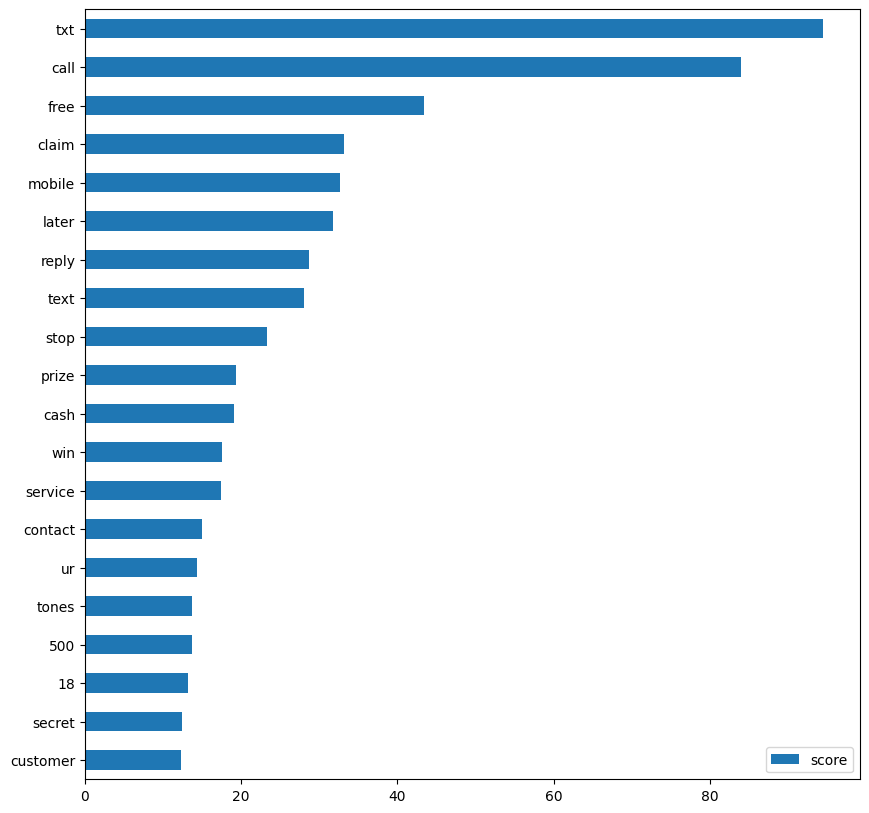

In [154]:
from xgboost import plot_importance
from matplotlib import pyplot as plt

feature_important = xgb_model.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

feature_important
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)

data.nlargest(20, columns="score").sort_values(by = "score", ascending=True).plot(kind='barh', figsize = (10,10)) ## plot top 40 features

#check top 20 features, each feature represent the frequency of a word in the message
